In [28]:
import os
os.chdir('/root/myWorkPlace')
from typing import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.optim
import torch.nn as nn
import torch
import torch.nn.functional as F

In [29]:
data = pd.read_csv('MTSDM/MTSDM/data/Hospital1.csv')
print(data.head(3))

               TIME  OCCUPANCY      RATE
0  01/06/2018 00:00         30  0.073529
1  01/06/2018 00:05         30  0.073529
2  01/06/2018 00:10         30  0.073529


In [30]:
data = np.array(data['RATE'])

seq_l = 6

In [31]:
def rnn_data(sequence, length):
    output_sequence = np.zeros([sequence.shape[0] - length,
                               length, 
                               1])
    
    # [batch_size, seq_len, feature]
    output_y = np.zeros([sequence.shape[0] - length, 1])
    for i in range(sequence.shape[0] - length):
        output_sequence[i, :, 0] = sequence[i:i + length]
        output_y[i, 0] = sequence[i + length]
    return output_sequence, output_y

x, y = rnn_data(data, seq_l)

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

loss = 0.001401629764586687


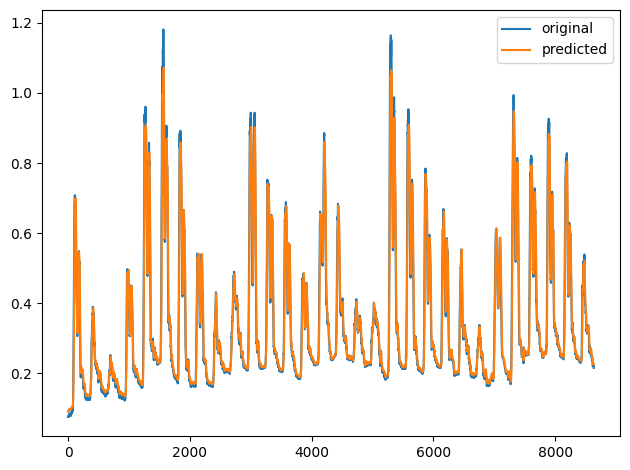

In [52]:
class LSTM(nn.Module):
    def __init__(self,
                 input_size: Any,
                 hidden_size: Any,
                 output_size: Any,
                 seq_l: Any,
                 ):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size * seq_l,
                                output_size)
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_l = seq_l
        self.output_size = output_size
    def forward(self, x_in):
        # 将输入x_in传入lstm层，得到输出x_in和隐藏状态h_n
        x_in, _ = self.lstm(x_in)
        b, s, f = x_in.shape # batch_size, seq_len, feature
        x_in = x_in.reshape(b, -1)
        x_in = self.linear(x_in)
        return x_in
    
net = LSTM(input_size=1, hidden_size=12, output_size=1, seq_l=seq_l)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())
epoch = 100

x = net(x_tensor)
print(x.shape)

exit(0) 

for i in range(epoch):
    optimizer.zero_grad()
    y_predict = net(x_tensor)
    loss = loss_fn(y_predict, y_tensor)
    loss.backward()
    optimizer.step()

if (i+1) % 10 == 0:
        print('loss =', loss.item())
        x_plot = x_tensor.detach().numpy()
        y_predict_plot = y_predict.detach().numpy()
        y_plot = y_tensor.detach().numpy()
        plt.clf()
        plt.plot(y_plot, label='original')
        plt.plot(y_predict_plot, label='predicted')
        plt.legend()
        plt.tight_layout()
        plt.pause(0.5)
        plt.ioff()
